C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_8276\2799720449.py:48: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file)


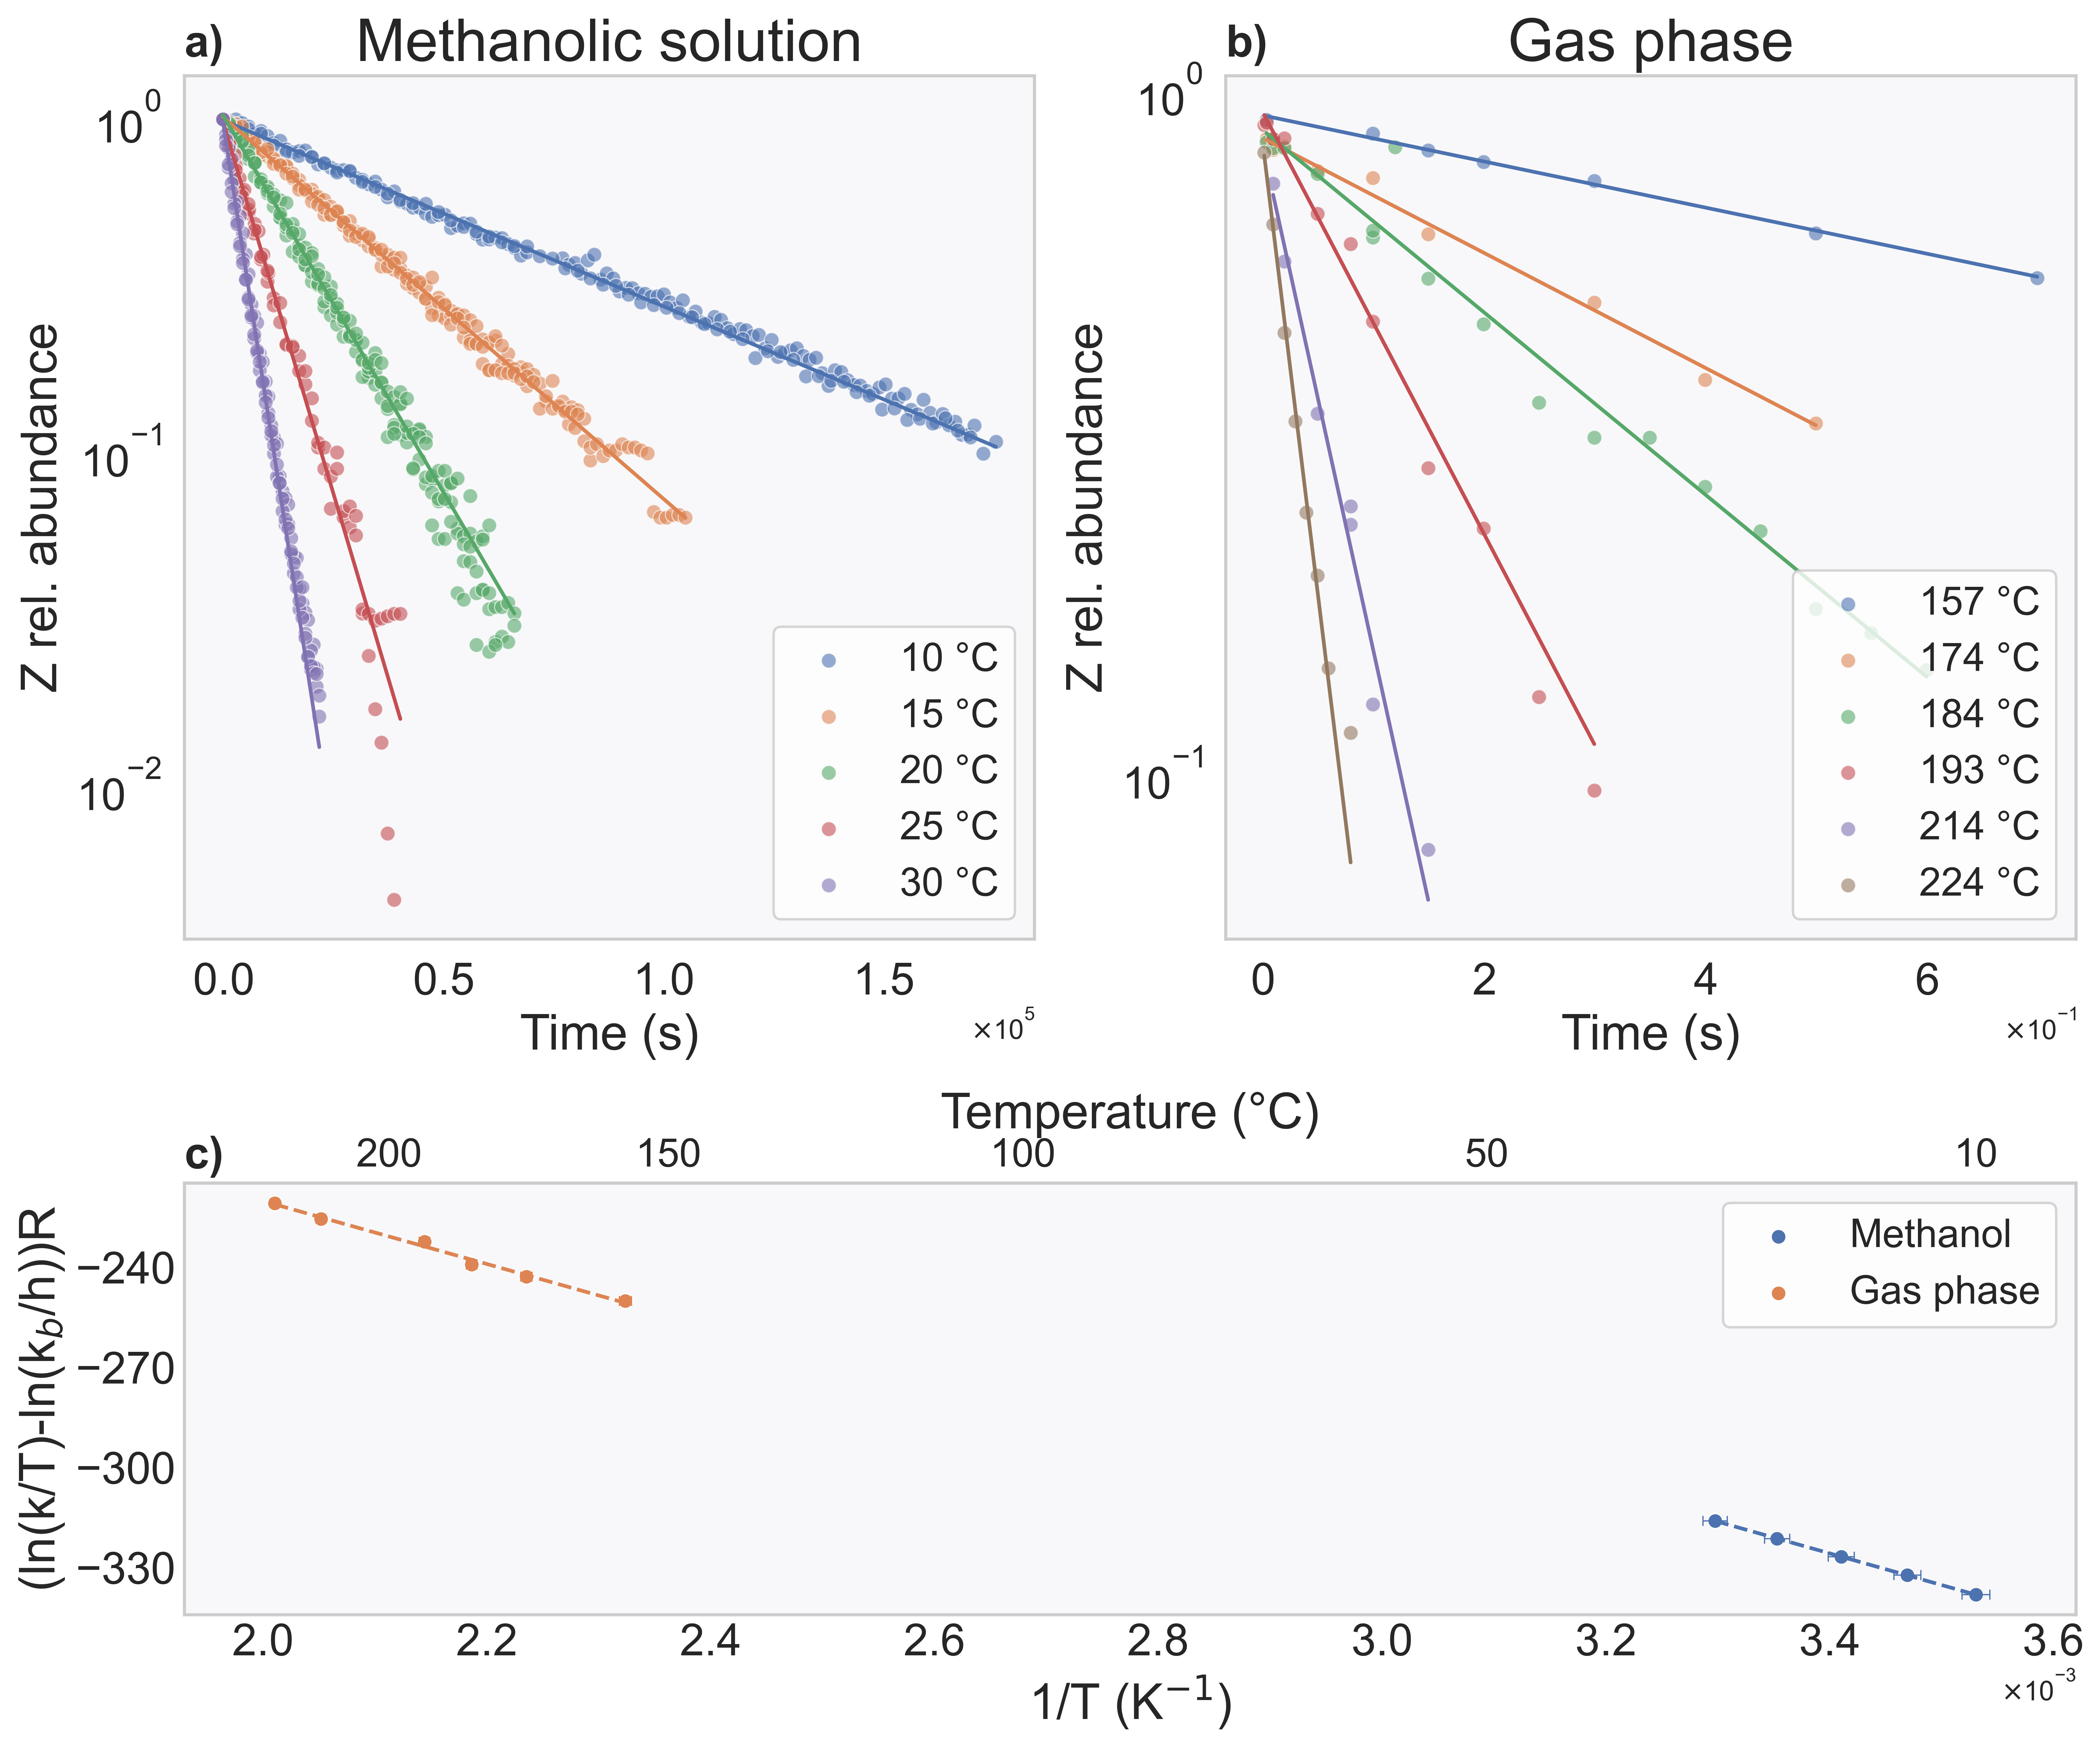

In [8]:
from KIMETICS import *
from matplotlib.ticker import MaxNLocator, AutoMinorLocator, ScalarFormatter, FuncFormatter, MultipleLocator
from sklearn.linear_model import LinearRegression

files_1=[[pathlib.Path('C:/Users/Thomas/Documents/#UMONS/FRIA/Data/Paper 1/Eyring_plots_Figure/NspeNspeN2tz/Solution/data_10_1.csv'), pathlib.Path('C:/Users/Thomas/Documents/#UMONS/FRIA/Data/Paper 1/Eyring_plots_Figure/NspeNspeN2tz/Solution/data_10_2.csv'), pathlib.Path('C:/Users/Thomas/Documents/#UMONS/FRIA/Data/Paper 1/Eyring_plots_Figure/NspeNspeN2tz/Solution/data_10_3.csv')], [pathlib.Path('C:/Users/Thomas/Documents/#UMONS/FRIA/Data/Paper 1/Eyring_plots_Figure/NspeNspeN2tz/Solution/data_15_1.csv'), pathlib.Path('C:/Users/Thomas/Documents/#UMONS/FRIA/Data/Paper 1/Eyring_plots_Figure/NspeNspeN2tz/Solution/data_15_2.csv'), pathlib.Path('C:/Users/Thomas/Documents/#UMONS/FRIA/Data/Paper 1/Eyring_plots_Figure/NspeNspeN2tz/Solution/data_15_3.csv')], [pathlib.Path('C:/Users/Thomas/Documents/#UMONS/FRIA/Data/Paper 1/Eyring_plots_Figure/NspeNspeN2tz/Solution/data_20_1.csv'), pathlib.Path('C:/Users/Thomas/Documents/#UMONS/FRIA/Data/Paper 1/Eyring_plots_Figure/NspeNspeN2tz/Solution/data_20_2.csv'), pathlib.Path('C:/Users/Thomas/Documents/#UMONS/FRIA/Data/Paper 1/Eyring_plots_Figure/NspeNspeN2tz/Solution/data_20_3.csv'), pathlib.Path('C:/Users/Thomas/Documents/#UMONS/FRIA/Data/Paper 1/Eyring_plots_Figure/NspeNspeN2tz/Solution/data_20_4.csv')], [pathlib.Path('C:/Users/Thomas/Documents/#UMONS/FRIA/Data/Paper 1/Eyring_plots_Figure/NspeNspeN2tz/Solution/data_25_1.csv'), pathlib.Path('C:/Users/Thomas/Documents/#UMONS/FRIA/Data/Paper 1/Eyring_plots_Figure/NspeNspeN2tz/Solution/data_25_2.csv'), pathlib.Path('C:/Users/Thomas/Documents/#UMONS/FRIA/Data/Paper 1/Eyring_plots_Figure/NspeNspeN2tz/Solution/data_25_3.csv')], [pathlib.Path('C:/Users/Thomas/Documents/#UMONS/FRIA/Data/Paper 1/Eyring_plots_Figure/NspeNspeN2tz/Solution/data_30_1.csv'), pathlib.Path('C:/Users/Thomas/Documents/#UMONS/FRIA/Data/Paper 1/Eyring_plots_Figure/NspeNspeN2tz/Solution/data_30_2.csv'), pathlib.Path('C:/Users/Thomas/Documents/#UMONS/FRIA/Data/Paper 1/Eyring_plots_Figure/NspeNspeN2tz/Solution/data_30_3.csv')]]

fig = plt.figure(figsize=(12, 10), dpi=600)
gs = fig.add_gridspec(2, 2, height_ratios=[1, 0.5])
sns.set(style="whitegrid")
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])
axes=[ax1, ax2, ax3]

system = "NspeNspeN2tz"
Temperature=[10, 15, 20, 25, 30]
k=[]
k_errors=[]
files=files_1
for i, temp in enumerate(Temperature):
    ax = ax1
    dfi=[]
    T_files=files[i]
    for j,file in enumerate(T_files):
        df=pd.read_csv(file)
        dfi.append(df)
    df=pd.concat([dfi for dfi in dfi], ignore_index=True)
    df=df[["Time", "Z"]]
    df=df.dropna()
    sns.scatterplot(data=df, x="Time", y="Z", label=f'{int(temp)} °C', ax=ax1, alpha=0.6)
    x, y=df["Time"].to_list(), df["Z"].to_list()
    popt, perr, rep, r2=fit_exponential_decay(x, y, y0=0)
    x_fit=np.linspace(df["Time"].min(), df["Time"].max(), 2000)
    y_fit=exponential_decay(x_fit, popt[0], popt[1], popt[2])
    sns.lineplot(x=x_fit, y=y_fit, ax=ax1)
    #ax.set_xscale("log")
    ax.set_title("Methanolic solution", fontsize=24)
    ax.set_xlabel('Time (s)', fontsize=20)
    ax.set_ylabel('Z rel. abundance', fontsize=20)
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.legend(fontsize=16)
    ax.grid(False)
    ax.set_facecolor('#F8F8FB')
    ax.set_yscale('log')
    ax.tick_params(axis='x', labelsize=18)  
    ax.tick_params(axis='y', labelsize=18)  
    k.append(popt[1])
    k_errors.append(perr[1])

x_Eyring= []
y_Eyring= []
y_errors=[]
Temperature=[temp+273.15 for temp in Temperature]
T_errors=[]
for i, temp in enumerate(Temperature):
    T_errors.append(1/(temp**2))
    temp=1/temp
    x_Eyring.append(temp)
    y=(np.log(k[i]*temp)-np.log(kb/h))*R
    y_Eyring.append(y)
    y_errors.append((np.sqrt((k_errors[i]/k[i])**2)+((T_errors[i]/Temperature[i])**2))*R)
x = np.array(x_Eyring).reshape(-1, 1)  
y = np.array(y_Eyring)
model = LinearRegression()
model.fit(x, y)
slope = model.coef_[0]
intercept = model.intercept_

y_pred = model.predict(x)
residuals = y - y_pred
n = len(y)  
p = 2       
residual_variance = np.sum(residuals**2) / (n - p)
X = np.column_stack((np.ones_like(x), x))
XTX_inv = np.linalg.inv(X.T @ X)
param_covariance = residual_variance * XTX_inv
intercept_error = np.sqrt(param_covariance[0, 0])
slope_error = np.sqrt(param_covariance[1, 1])

ax=ax3
x_fit=np.linspace(min(x_Eyring), max(x_Eyring), 2000)
y_fit=x_fit*slope+intercept
sns.lineplot(x=x_fit, y=y_fit, linestyle='--', ax=ax)
ax.errorbar(x_Eyring, y_Eyring, xerr=T_errors, yerr=y_errors, fmt='none', elinewidth=0.5, capsize=2, capthick=0.5)
sns.scatterplot(x=x_Eyring, y=y_Eyring, ax=ax, label="Methanol")

system = "NspeNspeN2tz"
Temperature=[157, 174, 184, 193, 214, 224]
k=[]
k_errors=[]
DIR=pathlib.Path(r'C:\Users\Thomas\Documents\#UMONS\FRIA\Data\Paper 1\Eyring_plots_Figure\NspeNspeN2tz\NspeNspeN2tz_H_data.h5')
for i, temp in enumerate(Temperature):
    ax = ax2
    df = pd.read_hdf(DIR, key=f'{temp}')
    
    df["Trapping time (s)"] = df["Trapping time"] / 1000

    sns.scatterplot(
        data=df,
        x="Trapping time (s)",  
        y="Relative intensity",
        label=f'{int(temp)} °C',
        ax=ax2,
        alpha=0.6
    )
    
    x, y = df["Trapping time (s)"].to_list(), df["Relative intensity"].to_list()
    popt, perr, rep, r2 = fit_exponential_decay(x, y, y0=0)

    x_fit = np.linspace(df["Trapping time (s)"].min(), df["Trapping time (s)"].max(), 2000)
    y_fit = exponential_decay(x_fit, popt[0], popt[1], popt[2])

    sns.lineplot(x=x_fit, y=y_fit, ax=ax2)

    ax.set_title("Gas phase", fontsize=24)
    ax.set_xlabel('Time (s)', fontsize=20)  
    ax.set_ylabel('Z rel. abundance', fontsize=20)
    ax.tick_params(axis='x', labelsize=18)  
    ax.tick_params(axis='y', labelsize=18)  

    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

    # Other properties
    ax.legend(fontsize=16)
    ax.grid(False)
    ax.set_facecolor('#F8F8FB')
    ax.set_yscale('log')

    k.append(popt[1])
    k_errors.append(perr[1])

x_Eyring= []
y_Eyring= []
y_errors=[]
Temperature=[temp+273.15 for temp in Temperature]
T_errors=[]
for i, temp in enumerate(Temperature):
    T_errors.append(1/(temp**2))
    temp=1/temp
    x_Eyring.append(temp)
    y=(np.log(k[i]*temp)-np.log(kb/h))*R
    y_Eyring.append(y)
    y_errors.append((k_errors[i]/k[i])+(T_errors[i]/Temperature[i])*R)

x = np.array(x_Eyring).reshape(-1, 1)  
y = np.array(y_Eyring)
model = LinearRegression()
model.fit(x, y)
slope = model.coef_[0]
intercept = model.intercept_

y_pred = model.predict(x)
residuals = y - y_pred
n = len(y)  
p = 2       
residual_variance = np.sum(residuals**2) / (n - p)
X = np.column_stack((np.ones_like(x), x))
XTX_inv = np.linalg.inv(X.T @ X)
param_covariance = residual_variance * XTX_inv
intercept_error = np.sqrt(param_covariance[0, 0])
slope_error = np.sqrt(param_covariance[1, 1])

ax=ax3
x_fit=np.linspace(min(x_Eyring), max(x_Eyring), 2000)
y_fit=x_fit*slope+intercept
line = sns.lineplot(x=x_fit, y=y_fit, linestyle='--', ax=ax)
line_color = line.get_lines()[-1].get_color()
scatter = sns.scatterplot(x=x_Eyring, y=y_Eyring, ax=ax, label="Gas phase", color=line_color)
ax.errorbar(x_Eyring, y_Eyring, xerr=T_errors, yerr=y_errors, fmt='none', elinewidth=0.5, capsize=2, capthick=0.5, ecolor=line_color)

ax.set_xlabel('1/T (K$^{-1}$)', fontsize=20)
ax.set_ylabel('(ln(k/T)-ln(k$_{b}$/h))R', fontsize=20)
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set_facecolor('#F8F8FB')
ax.grid(False)
ax.tick_params(axis='both', which='both', length=0)
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax.tick_params(axis='x', labelsize=18)  
ax.tick_params(axis='y', labelsize=18)  
ax.legend(fontsize=16)

def k_inv_to_celsius(x_k_inv):
    kelvin = 1 / x_k_inv
    return kelvin - 273.15

def celsius_to_k_inv(x_celsius):
    kelvin = x_celsius + 273.15
    return 1 / kelvin

secax = plt.gca().secondary_xaxis('top', functions=(k_inv_to_celsius, celsius_to_k_inv))
secax.set_xlabel("Temperature (°C)", fontsize=20)
secax.set_xticks([200, 150, 100, 50, 10])
secax.tick_params(axis='both', which='both', length=0)
secax.tick_params(axis='x', labelsize=16)  
secax.tick_params(axis='y', labelsize=16)  

for idx, ax in enumerate(axes):
    if idx==2:
        ax.text(
            x=0.00, y=1.11,  
            s=f"{chr(97 + idx)})",  
            transform=ax.transAxes,  
            fontsize=18, weight="bold", ha="left", va="top"
        )
    else:
        ax.text(
            x=0.00, y=1.06,  
            s=f"{chr(97 + idx)})", 
            transform=ax.transAxes, 
            fontsize=18, weight="bold", ha="left", va="top"
        )

plt.tight_layout()
plt.savefig(pathlib.Path(r'C:\Users\Thomas\Documents\#UMONS\FRIA\Data\Paper 1\Eyring_plots_Figure\Eyring_plots_Figure_bis.png'), dpi=600)
plt.savefig(pathlib.Path(r'C:\Users\Thomas\Documents\#UMONS\FRIA\Data\Paper 1\Eyring_plots_Figure\Eyring_plots_Figure_bis.svg'), dpi=600)
plt.show()